# Metrics
- measuring different phases
- panda: format, save, plotting
- clustering

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import itk
import itkwidgets
from itkwidgets import view, compare

(1, 2048, 2048)

## Measuring different phases

In [5]:
here


myViewer = view(concrete, mode='z') #slicing over z
myViewer

Viewer(geometries=[], gradient_opacity=0.22, mode='z', point_sets=[], rendered_image=<itkImagePython.itkImageF…

In [7]:
#These are the coordinates of your crop
myViewer.roi_region()
#[789, 1102, 0], [700, 681, 31]

itkImageRegion3([846, 492, 0], [657, 545, 31])

In [8]:
myViewer.roi_slice()

(slice(0, 32, None), slice(492, 1038, None), slice(846, 1504, None))

In [49]:
# User-selection is input for slicing np array
np_concrete = itk.array_from_image(concrete) 
roi = myViewer.roi_slice()
np_coreSample = np_concrete[roi]
#view(np_coreSample, annotations=False, ui_collapsed=True)

In [50]:
np_coreSample.shape

(31, 546, 658)

In [51]:
coreSample = itk.GetImageFromArray(np.ascontiguousarray(np_coreSample))
coreSample = itk.median_image_filter(coreSample)
view(coreSample)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF3; proxy o…

In [88]:
itk.imwrite(coreSample,'roiFiltered.tiff')

## Voxel clustering
- recreating volume with the least possible intensity values

In [52]:
from skimage import img_as_ubyte
np_coreSample = itk.array_from_image(coreSample)
np_coreSample = np_coreSample[:,::2,::2] #downsample for quick testing
np_coreSample = (np_coreSample - np.min(np_coreSample)) / np.max(np_coreSample-np.min(np_coreSample))
np_coreSample = img_as_ubyte(np_coreSample)

In [53]:
#plt.imshow((np_coreSample[1,:,:]))
view(np_coreSample)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageUC3; proxy …

In [58]:
x, y, z = np_coreSample.shape
np_coreSampFlat = np_coreSample.reshape((-1,1))
np_coreSampFlat.shape

(2784327, 1)

In [55]:
len(np.unique(np_coreSampFlat))

202

In [56]:
from sklearn import cluster
import time
start_time = time.time()

numberOfClusters = 3
kmeans_cluster = cluster.KMeans(n_clusters=numberOfClusters)
kmeans_cluster.fit(np_coreSampFlat)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

duration = time.time() - start_time
print(f"Duration {duration} seconds")

Duration 10.845766305923462 seconds


In [79]:
img_labels = cluster_centers[cluster_labels].reshape(x, y, z)

numpy.ndarray

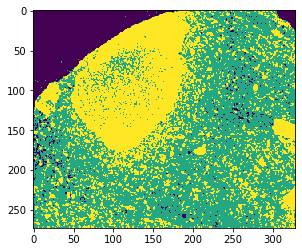

In [82]:
plt.imshow(img_labels[15,:,:]) #cmp with np_coreSample

In [87]:
#TODO: using img_as_ubyte here is a hack... 
img_labels = img_as_ubyte( (img_labels-np.min(img_labels))/np.max(img_labels-np.min(img_labels)) )
view(itk.GetImageFromArray(img_labels))

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageUC3; proxy …

In [85]:
view(img_labels,annotations=False, ui_collapsed=True,mode='z')

Viewer(annotations=False, geometries=[], gradient_opacity=0.22, mode='z', point_sets=[], rendered_image=<itkIm…

## Segment phases
- matrix, aggregate and interstitial space (pores)

In [4]:
# TODO: show individual phases, apply morphological filters for cleaning